In [4]:
import numpy as np
import serial
import time
import matplotlib.pyplot as plt


------------

para envio de datos convencional

In [5]:
ser = serial.Serial('COM2',115200,bytesize=serial.EIGHTBITS,parity=serial.PARITY_NONE,stopbits=serial.STOPBITS_ONE,timeout=None)

In [6]:
print(ser.name)
if ser.isOpen():
    ser.close()
ser.open()
ser.isOpen()

COM2


True

Protocolo uFisio __NEW__

In [7]:
def envio_sync():
    trama_sincronismo = bytes([0x23,0x23,0x0D,0x0A])
    env = ser.write(trama_sincronismo)

def envio_dato(dato_RED,dato_IR,dato_ECG):    
    dato_RED_bin = (dato_RED).to_bytes(2,'big',signed=False)
    dato_IR_bin = (dato_IR).to_bytes(2,'big',signed=False)
    dato_ECG_bin = (dato_ECG).to_bytes(2,'big',signed=False)

    trama = bytes([dato_RED_bin[0],dato_RED_bin[1],dato_IR_bin[0],dato_IR_bin[1],dato_ECG_bin[0],dato_ECG_bin[1]])
    env = ser.write(trama)                  

------------

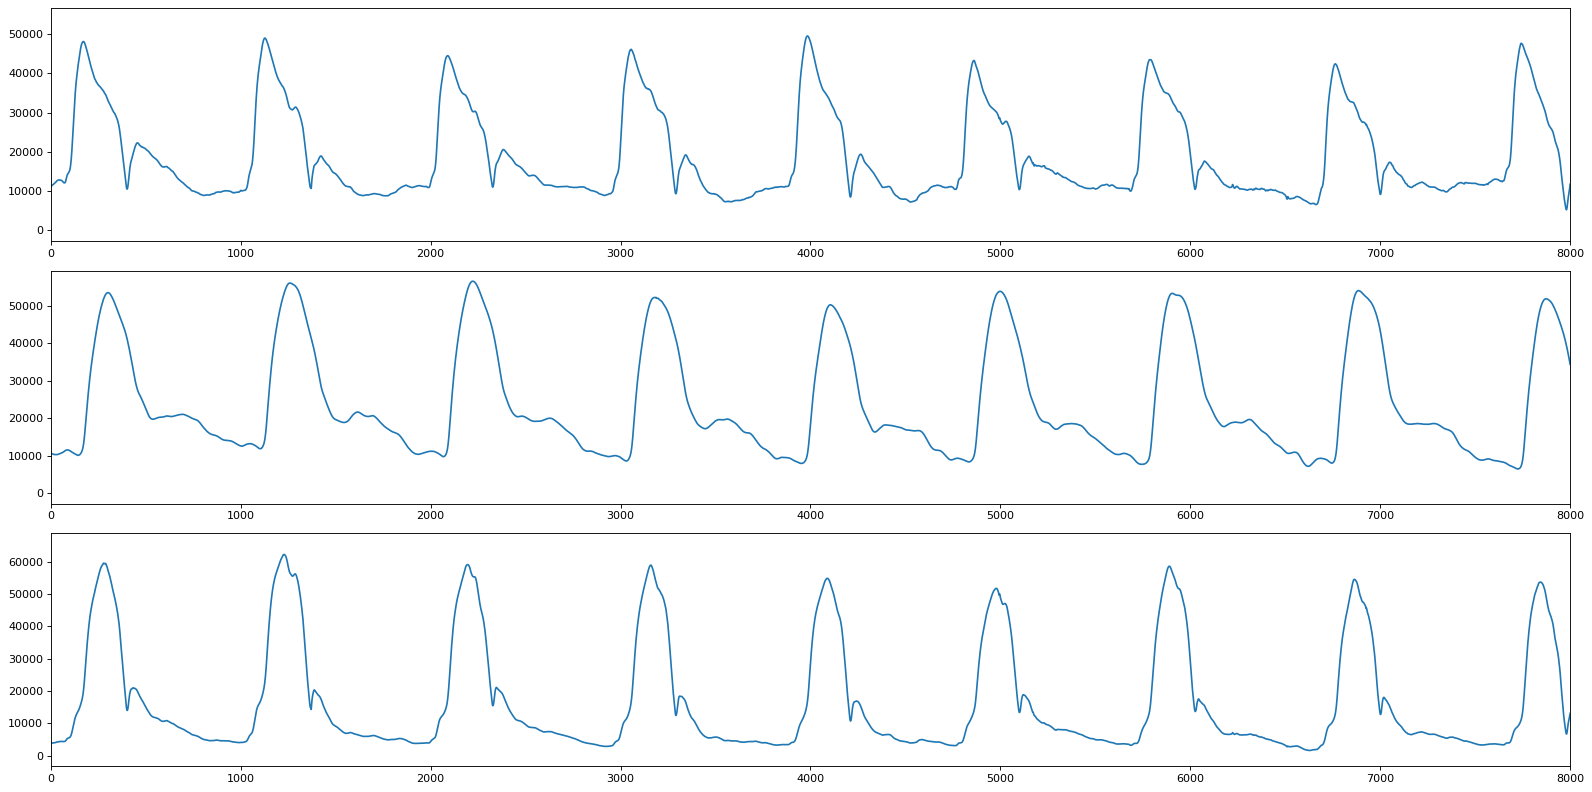

In [21]:
from matplotlib.pyplot import figure

carotida = list()
femoral = list()
data = np.genfromtxt('signal_example.txt', delimiter=' ')

carotida = data[:,1]
femoral = data[:,3]

carotida = (carotida-np.min(carotida))/20
femoral = (femoral-np.min(femoral))/32

ECG = (carotida * femoral)

ECG = ECG / np.max(ECG) * 65535

fig, axes = plt.subplots(3,1, figsize=(20, 10), dpi=80)
axes[0].plot(range(0,len(carotida)), carotida.astype(int), label = 'RED')
axes[1].plot(range(0,len(femoral)), femoral.astype(int), label = 'IR')
axes[2].plot(range(0,len(ECG)), ECG, label = 'ECG')
axes[0].set_xlim([0,8000])
axes[1].set_xlim([0,8000])
axes[2].set_xlim([0,8000])

plt.tight_layout()

In [31]:
tiempo_anterior = 0
tiempo_medido = 0

fs = 1000

while True:
    for index in range(0,len(carotida)):
        if index%10 == 0:
            envio_sync()

            tiempo_anterior = time.time()
            while tiempo_medido < (1/fs):
                tiempo_medido = time.time()-tiempo_anterior
            tiempo_medido = 0


        envio_dato(int(carotida[index]),int(femoral[index]),int(ECG[index]))

        tiempo_anterior = time.time()
        while tiempo_medido < (1/fs):
            tiempo_medido = time.time()-tiempo_anterior
        tiempo_medido = 0
    

KeyboardInterrupt: 

In [32]:
ser.reset_input_buffer()  #limpia buffer del puerto serie